## Recognizing emotions
- previously we categorized the tweets into positive negative and neutral. Now with the help of pretrained models and libraries in NLP. We can categorize tweets into emotions based on keywords and ngrams.

In [ ]:
!pip install nrclex


In [4]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk(' '):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# examples
from nrclex import NRCLex
import nltk
nltk.download('punkt')
tweet = NRCLex('Wow you are so happy')
#Return affect dictionary
print(tweet.affect_dict)
#Return raw emotional counts
print("\n",tweet.raw_emotion_scores)
#Return highest emotions
print("\n", tweet.top_emotions)
#Return affect frequencies
print("\n",tweet.affect_frequencies)

In [10]:
text = NRCLex("We can do it ")
# Getting top emotions
print("\n", text.top_emotions)
# Getting the top most emotion
print("\n", text.top_emotions[0][0])
# Getting the top most emotion score
print("\n", text.top_emotions[0][1])


 [('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]

 fear

 0.0


In [13]:
df = pd.read_csv('correctedKanyeTweets.csv')

In [14]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['Tweet'].apply(emotion)
df.head()

,Unnamed: 0,Tweet,Emotion
0,0,Let’s always remember this as my final tweet #,No emotion
1,1,Let’s break one last window before we get outa...,surprise
2,2,: Kanye West promotes his Presidential campa...,fear
3,3,: the clues were there all along,No emotion
4,4,Well everyone We had a nice run Jesus is King,No emotion


In [15]:
for col in df.columns:
    print(col)

Unnamed: 0
Tweet
Emotion


In [16]:
df.drop('Unnamed: 0',axis=1)

,Tweet,Emotion
0,Let’s always remember this as my final tweet #,No emotion
1,Let’s break one last window before we get outa...,surprise
2,: Kanye West promotes his Presidential campa...,fear
3,: the clues were there all along,No emotion
4,Well everyone We had a nice run Jesus is King,No emotion
...,...,...
3133,YEEZUS ALBUM NOW AVAILABLE AT,No emotion
3134,NEW MUSIC AT NEW PROJECTION LOCATIONS @,No emotion
3135,BLK SKN HEAD,No emotion
3136,BLK SKN HEAD,No emotion


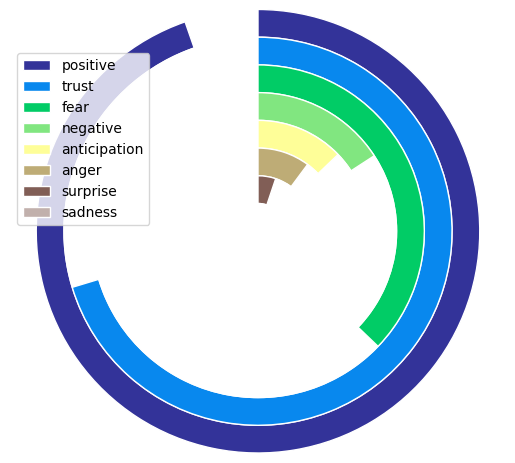

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

In [18]:
b = df_chart.Emotion.value_counts().index.tolist()
a = df_chart.Emotion.value_counts(normalize = True).tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Emotions')
fig.show()

## Future Works
- using Deep Learning models and R-CNNs to classify data into emotions.
- using other tokenizers and word2vec etc for simple algorithms for text classificatioin.
- improving accuracy by using a pre-trained model on custom dataset which is trained for slangs and twitter modern lingo